<a href="https://colab.research.google.com/github/Rajvee-Sharma/NYC-Taxi-Trip-Prediction/blob/main/Regression_NYC_Taxi_Trip_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
file_path = "/content/drive/MyDrive/NYC Taxi Data.csv"

In [ ]:
df = pd.read_csv(file_path)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [ ]:
print('No. of rows:', df.shape[0])
print('No. of columns:', df.shape[1])

No. of rows: 1458644
No. of columns: 11


In [ ]:
df.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.dropna()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435
...,...,...,...,...,...,...,...,...,...,...,...
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373


In [ ]:
df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

In [ ]:
df_1 = df.nunique()
df_1.sort_values()


vendor_id                   2
store_and_fwd_flag          2
passenger_count            10
trip_duration            7417
pickup_longitude        23047
dropoff_longitude       33821
pickup_latitude         45245
dropoff_latitude        62519
pickup_datetime       1380222
dropoff_datetime      1380377
id                    1458644
dtype: int64

In [ ]:
df.describe()


,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


Text(0.5, 1.0, 'Descriptive Stats')

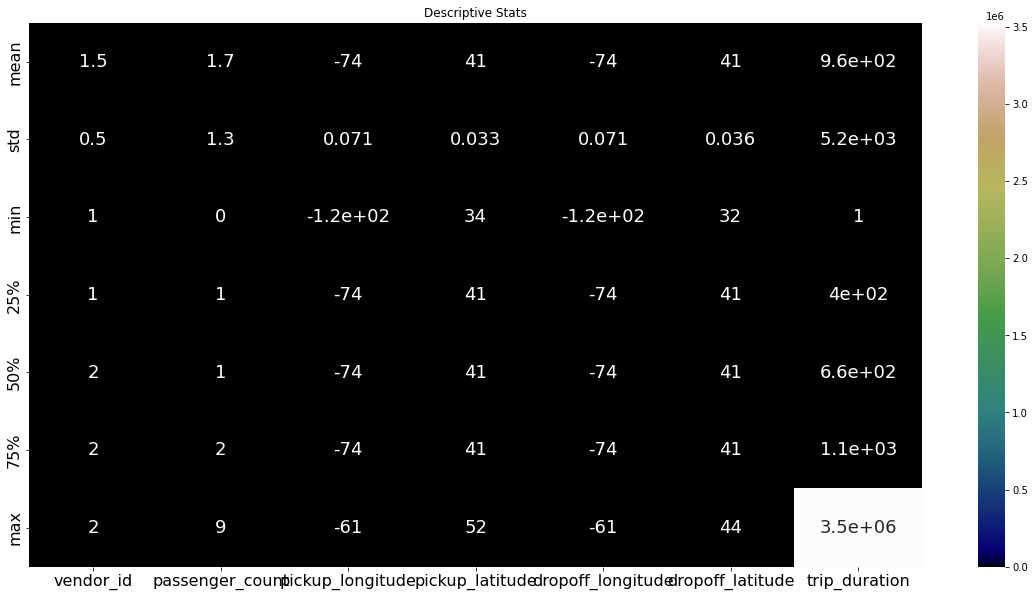

In [ ]:
plt.figure(figsize=(20,10))
svm = sns.heatmap(df.describe()[1:], annot=True, cmap='gist_earth', annot_kws={"size":18})
svm.set_xticklabels(svm.get_xmajorticklabels(), fontsize=16)
svm.set_yticklabels(svm.get_ymajorticklabels(), fontsize=16)

plt.title('Descriptive Stats')

In [ ]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [ ]:
df['pickup_month'] = df['pickup_datetime'].dt.month
df['dropoff_month'] = df['dropoff_datetime'].dt.month

df['pickup_hour'] =df['pickup_datetime'].dt.hour
df['dropoff_hour'] = df['dropoff_datetime'].dt.hour

df['pickup_weekday'] = df['pickup_datetime'].dt.weekday
df['dropoff_weekday'] = df['dropoff_datetime'].dt.weekday


In [ ]:
df['pickup_day'] = df['pickup_datetime'].dt.day
df['dropoff_day'] = df['dropoff_datetime'].dt.day

df['pickup_date'] = df['pickup_datetime'].dt.date

df['pickup_min'] = df['pickup_datetime'].dt.minute
df['dropoff_min'] = df['dropoff_datetime'].dt.minute

# **Feature Engineering - Total Distance Travelled**

In [ ]:
#Importing the library which let us calculate distance from geographical coordinates.
from geopy.distance import great_circle

In [ ]:
#Distance_cal is the function to calculate distance between pickup and dropoff coordinate.

def distance_cal(pickup_lat, pickup_long, dropoff_lat, dropoff_long):

  start_coordinates = (pickup_lat, pickup_long)
  stop_coordinates = (dropoff_lat, dropoff_long)

  return great_circle(start_coordinates,stop_coordinates).km

In [ ]:
#Calculate distance and assign new column to the DataFrame:

df['distance'] = df.apply(lambda x: distance_cal(x['pickup_latitude'],x['pickup_longitude'], x['dropoff_latitude'],x['dropoff_longitude']), axis=1)

In [ ]:
#It gives top 5 rows
df.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_date,pickup_min,dropoff_min,distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,17,17,0,0,14,14,2016-03-14,24,32,1.498523
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,0,0,6,6,12,12,2016-06-12,43,54,1.805510
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,11,12,1,1,19,19,2016-01-19,35,10,6.385108
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,19,19,2,2,6,6,2016-04-06,32,39,1.485501
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,13,13,5,5,26,26,2016-03-26,30,38,1.188590


In [ ]:
#Resetting the index
df.dtypes.reset_index()

,index,0
0,id,object
1,vendor_id,int64
2,pickup_datetime,datetime64[ns]
3,dropoff_datetime,datetime64[ns]
4,passenger_count,int64
5,pickup_longitude,float64
6,pickup_latitude,float64
7,dropoff_longitude,float64
8,dropoff_latitude,float64
9,store_and_fwd_flag,object


# **EDA - Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Id_of_vendor')

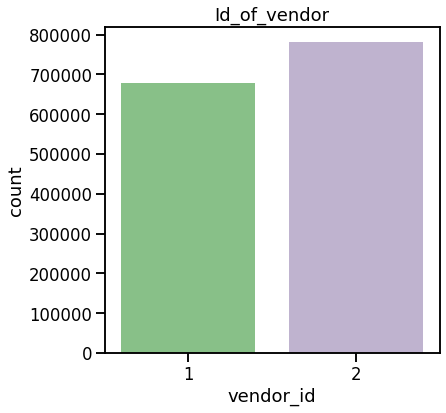

In [ ]:
sns.set_context('talk')

plt.figure(figsize=(6,6))
sns.countplot(df['vendor_id'], palette='Accent')
plt.title('Id_of_vendor')

**Store and forward flag**

In [ ]:
df['store_and_fwd_flag'].value_counts()

N    1450599
Y       8045
Name: store_and_fwd_flag, dtype: int64

Text(0.5, 1.0, 'Store and Forward Flag')

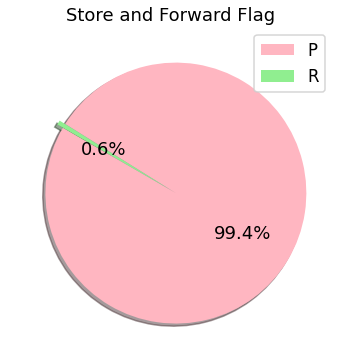

In [ ]:
#Create store and forward flag

plt.figure(figsize=(6,6))
plt.pie(df['store_and_fwd_flag'].value_counts(), colors=['lightpink','lightgreen'], shadow=True, explode=(0.05,0), autopct="%1.1f%%", startangle=150)
plt.legend(labels=['P','R'])
plt.title('Store and Forward Flag')

**Trip duration and target variable**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


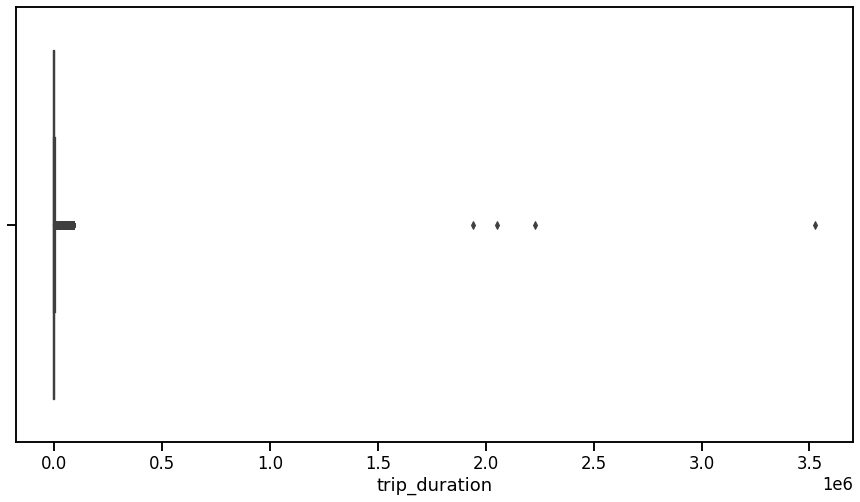

In [ ]:
#Visualize the trip duration

plt.figure(figsize=(15,8))
sns.boxplot(df['trip_duration'])

In [ ]:
df['trip_duration'].sort_values(ascending=False)

978383     3526282
924150     2227612
680594     2049578
355003     1939736
1234291      86392
            ...   
269418           1
467645           1
533799           1
726971           1
311745           1
Name: trip_duration, Length: 1458644, dtype: int64

In [ ]:
#Drop these 4 rows

df.drop(df[df['trip_duration'] == 3526282].index, inplace=True)
df.drop(df[df['trip_duration'] == 2227612].index, inplace=True)
df.drop(df[df['trip_duration'] == 2049578].index, inplace=True)
df.drop(df[df['trip_duration'] == 1939736].index, inplace=True)


In [ ]:
df.shape

(1458640, 23)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


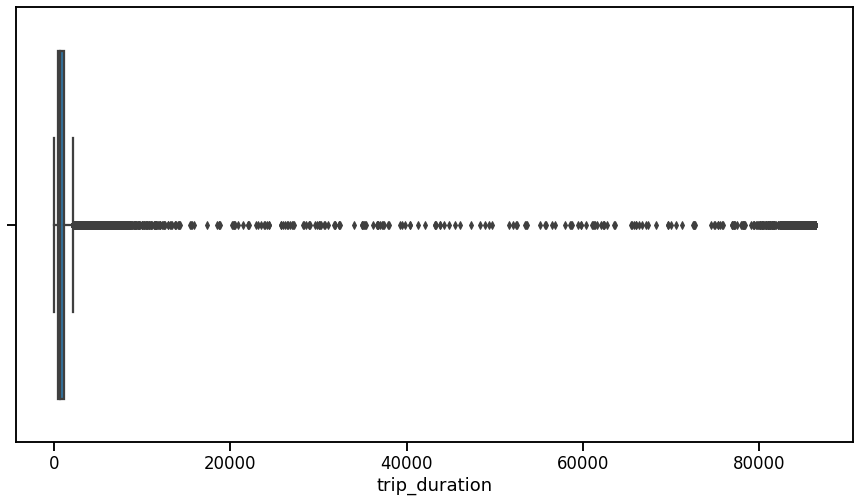

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(df['trip_duration'])

**Passenger count-**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Count distribution of passenger')

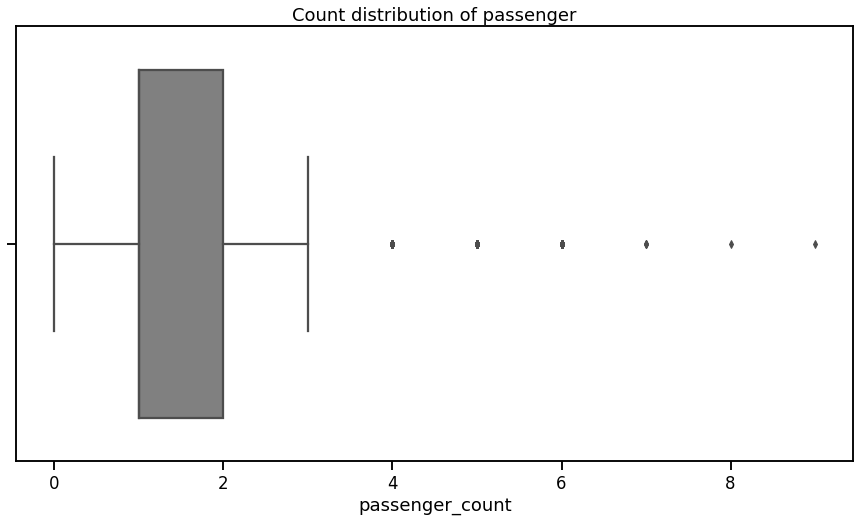

In [ ]:
#Visualize this passenger count

plt.figure(figsize=(15,8))
sns.boxplot(df['passenger_count'], color='grey')
plt.title('Count distribution of passenger')

In [ ]:
df.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
0         60
7          3
9          1
8          1
Name: passenger_count, dtype: int64

In [ ]:
#Removing the rows having 0 or 7 or 9 passenger count
df = df[df['passenger_count'] >0]
df = df[df['passenger_count'] <=6 ]

df.passenger_count.value_counts()

1    1033537
2     210317
5      78088
3      59896
6      48333
4      28404
Name: passenger_count, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


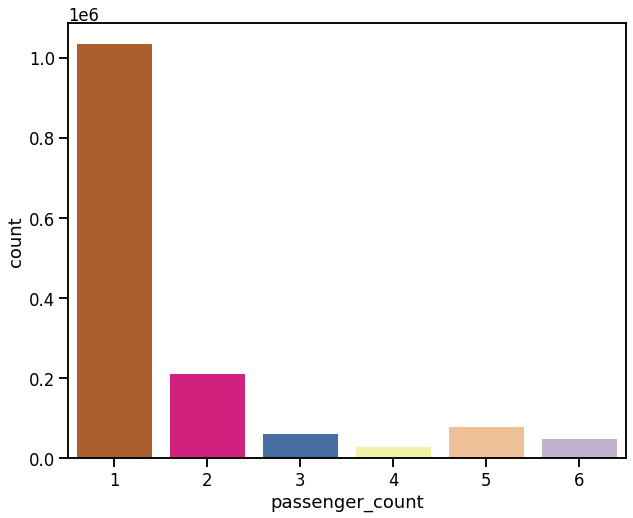

In [ ]:
#Graph showing passenger count

plt.figure(figsize=(10,8))
sns.countplot(df['passenger_count'], palette = 'Accent_r')

**DIstance**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<function matplotlib.pyplot.show>

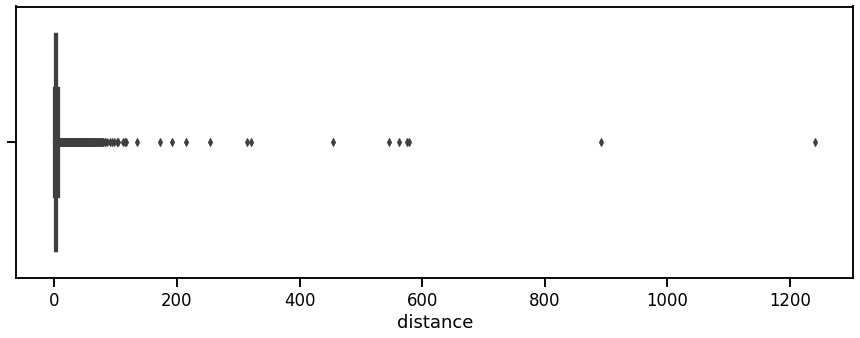

In [ ]:
plt.figure(figsize=(15,5))
sns.boxplot(df.distance)
plt.show

In [ ]:
print("There are {} trip records with 0 km distance".format(df.distance[df.distance == 0].count()))

There are 5887 trip records with 0 km distance


In [ ]:
df[df.distance == 0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_date,pickup_min,dropoff_min,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,...,18,18,0,0,29,29,2016-02-29,39,42,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,...,18,18,1,1,10,10,2016-05-10,7,26,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,...,23,23,0,0,16,16,2016-05-16,15,31,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,...,19,19,0,0,25,25,2016-01-25,45,54,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,...,22,22,2,2,27,27,2016-01-27,29,29,0.0


**Trips per day in a week**

Text(0, 0.5, 'Count')

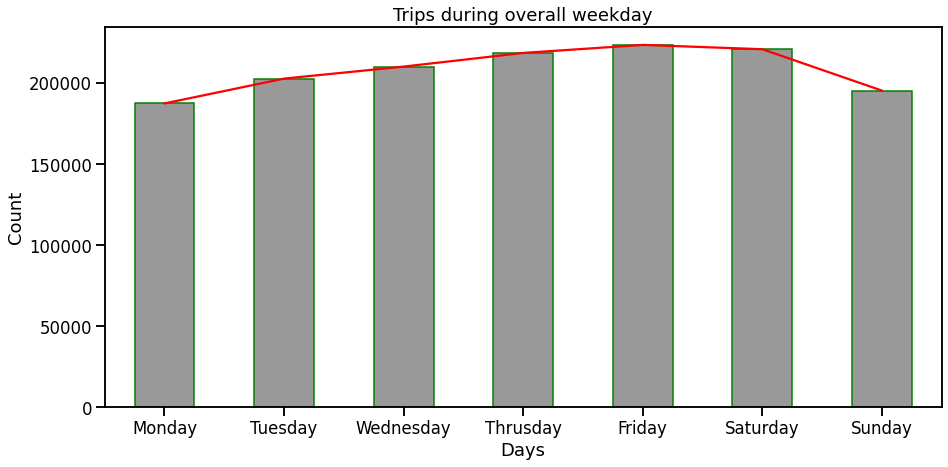

In [ ]:
plt.figure(figsize=(15,7))
pickup_in_week = df['pickup_weekday'].value_counts()
pickup_in_week.sort_index().plot(kind='bar', edgecolor='green', color='0.6')
pickup_in_week.sort_index().plot(kind='line', color='red')

plt.xticks(ticks=[0,1,2,3,4,5,6], labels = ['Monday','Tuesday','Wednesday','Thrusday','Friday','Saturday','Sunday'], rotation=0)
plt.title('Trips during overall weekday')
plt.xlabel('Days')
plt.ylabel('Count')

**Trips per hour**

Text(0, 0.5, 'Counts')

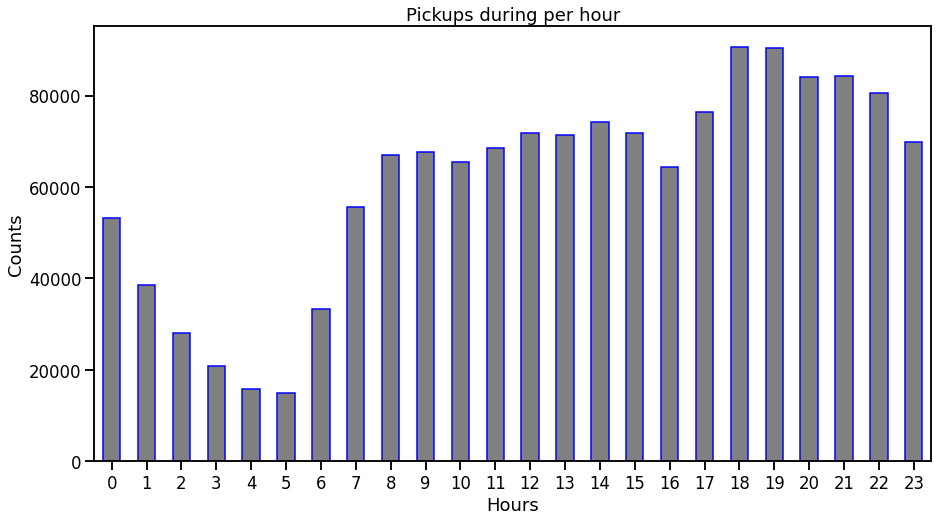

In [ ]:
#Analysing hourly pickups

plt.figure(figsize=(15,8))
hour_of_pickup = df['pickup_hour'].value_counts()
hour_of_pickup.sort_index().plot(kind='bar',edgecolor='blue', color='0.5')
plt.xticks(rotation=0)

plt.title('Pickups during per hour')
plt.xlabel('Hours')
plt.ylabel('Counts')

**Trips per day in a month**

Text(0, 0.5, 'Counts')

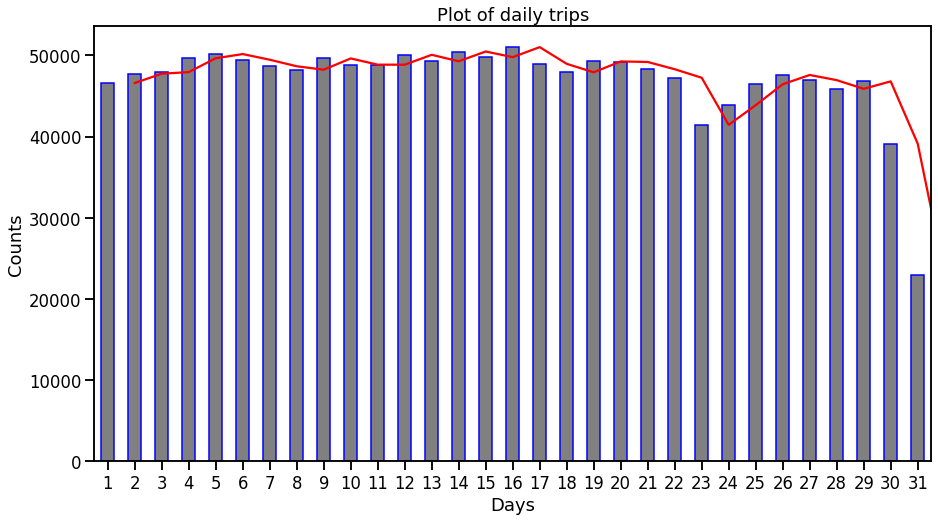

In [ ]:
plt.figure(figsize=(15,8))
pickup_day = df['pickup_day'].value_counts()
pickup_day.sort_index().plot(kind='line', color ='red')
pickup_day.sort_index().plot(kind='bar', edgecolor='blue', color='0.5')
plt.xticks(rotation=0)

plt.title('Plot of daily trips')
plt.xlabel('Days')
plt.ylabel('Counts')

**Trips per month**

In [ ]:
sorted(df['pickup_month'].unique())

[1, 2, 3, 4, 5, 6]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Trips during a month')

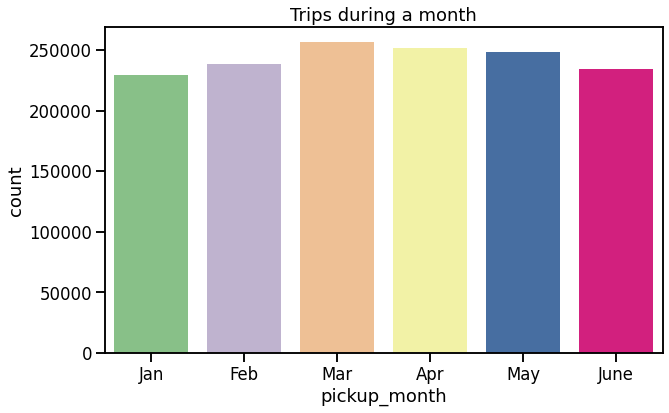

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df['pickup_month'], palette = 'Accent')
plt.xticks([0,1,2,3,4,5], labels=['Jan','Feb', 'Mar', 'Apr','May', 'June'])
plt.title('Trips during a month')

## **Bivariate Analysis with target variable**

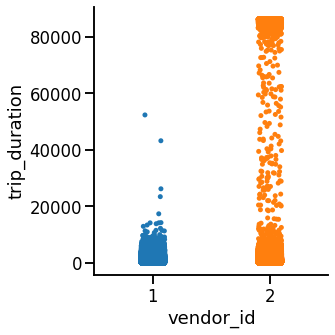

In [ ]:
#Trip duration per vendor estimator 
sns.catplot(x='vendor_id', y='trip_duration', kind='strip', data=df)

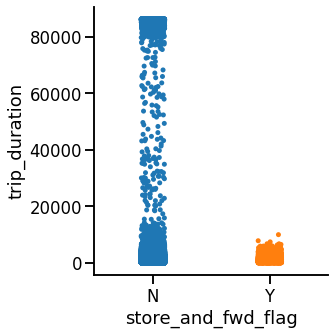

In [ ]:
sns.catplot(y='trip_duration', x='store_and_fwd_flag',kind='strip',data=df)

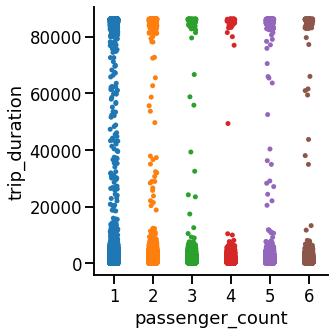

In [ ]:
#Duration of trip per hour
sns.catplot(y='trip_duration', x='passenger_count', kind='strip', data=df)

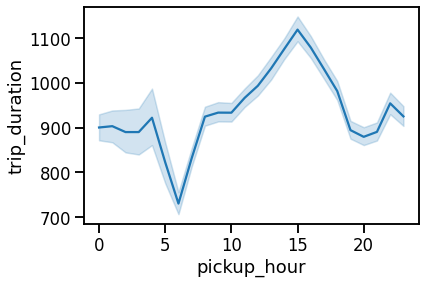

In [ ]:
#Duration of trip during per day time
sns.lineplot(x='pickup_hour',y='trip_duration', data=df)

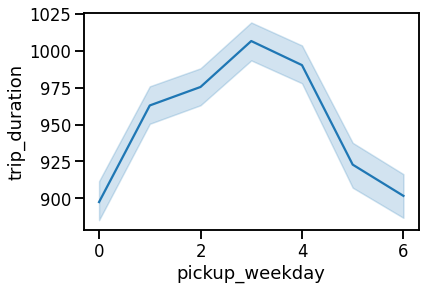

In [ ]:
#Duration of trip per day of week
sns.lineplot(x='pickup_weekday', y='trip_duration', data=df)

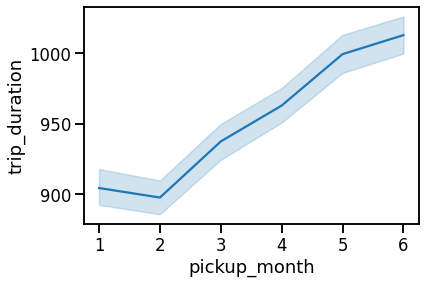

In [ ]:
#Duration of trip during a month
sns.lineplot(x='pickup_month', y='trip_duration', data=df)

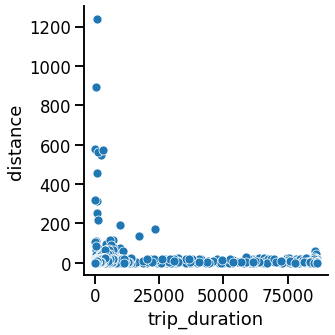

In [ ]:
sns.relplot(x='trip_duration', y=df.distance, data=df)

In [ ]:
df[df['distance'] == 0].head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_date,pickup_min,dropoff_min,distance
246,id3487442,2,2016-02-29 18:39:12,2016-02-29 18:42:59,1,-73.981819,40.768963,-73.981819,40.768963,N,...,18,18,0,0,29,29,2016-02-29,39,42,0.0
291,id0924324,2,2016-05-10 18:07:52,2016-05-10 18:26:21,2,-73.959068,40.775661,-73.959068,40.775661,N,...,18,18,1,1,10,10,2016-05-10,7,26,0.0
407,id1145809,2,2016-05-16 23:15:13,2016-05-16 23:31:00,6,-73.808487,40.687336,-73.808487,40.687336,N,...,23,23,0,0,16,16,2016-05-16,15,31,0.0
702,id3499387,1,2016-01-25 19:45:12,2016-01-25 19:54:52,1,-73.786720,40.647041,-73.786720,40.647041,N,...,19,19,0,0,25,25,2016-01-25,45,54,0.0
1620,id0753277,1,2016-01-27 22:29:31,2016-01-27 22:29:58,1,-74.209854,40.816853,-74.209854,40.816853,N,...,22,22,2,2,27,27,2016-01-27,29,29,0.0


**Label Encoding**

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
df['store_and_fwd_flag'] = enc.fit_transform(df['store_and_fwd_flag'])
df['vendor_id'] = enc.fit_transform(df['vendor_id'])

Text(0.5, 1.0, 'Correlation Plot')

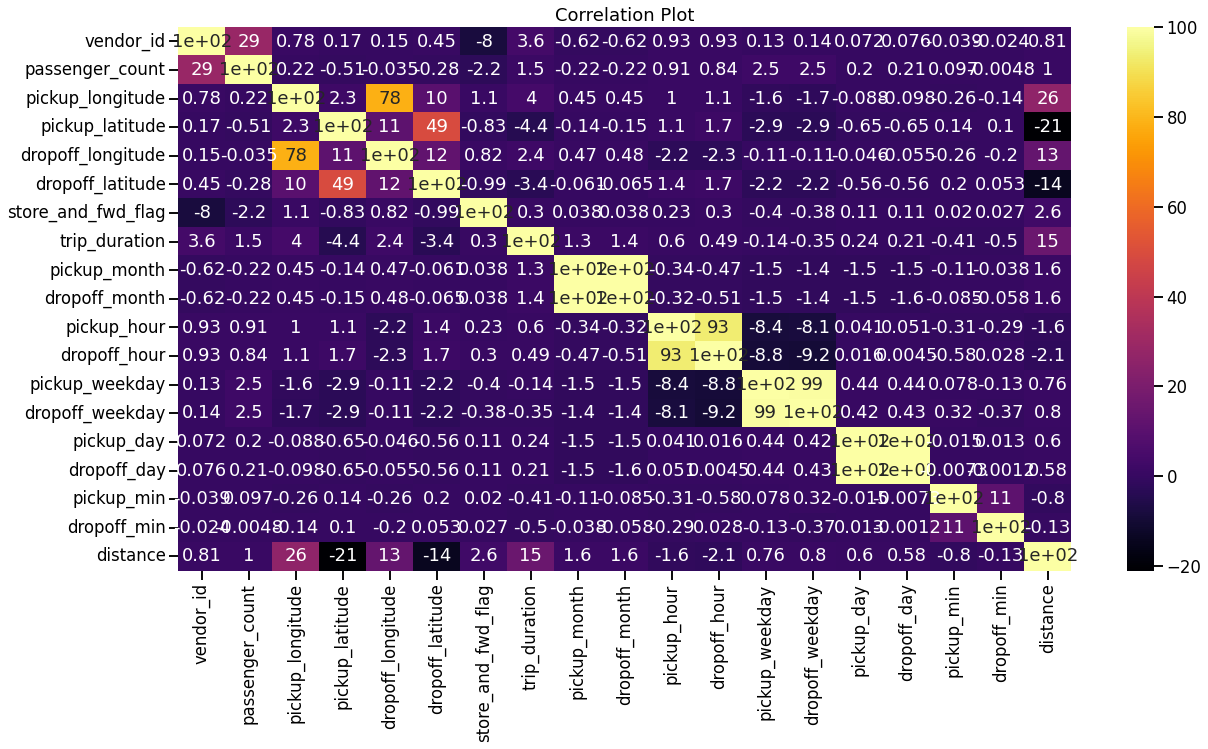

In [ ]:
#Plotting pearson correlation heatmap

plt.figure(figsize=(20,10))
sns.heatmap(df.corr()*100, annot=True, cmap='inferno')
plt.title('Correlation Plot')

In [ ]:
nyc_taxi_df = df.drop(['id','pickup_datetime','pickup_date','dropoff_datetime','distance'], axis=1)
nyc_taxi_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_min,dropoff_min
0,1,1,-73.982155,40.767937,-73.964630,40.765602,0,455,3,3,17,17,0,0,14,14,24,32
1,0,1,-73.980415,40.738564,-73.999481,40.731152,0,663,6,6,0,0,6,6,12,12,43,54
2,1,1,-73.979027,40.763939,-74.005333,40.710087,0,2124,1,1,11,12,1,1,19,19,35,10
3,1,1,-74.010040,40.719971,-74.012268,40.706718,0,429,4,4,19,19,2,2,6,6,32,39
4,1,1,-73.973053,40.793209,-73.972923,40.782520,0,435,3,3,13,13,5,5,26,26,30,38


In [ ]:
nyc_taxi_df.shape

(1458575, 18)

# **Normalization**

In [ ]:
#Predictors and Target variable
x = nyc_taxi_df.drop(['trip_duration'], axis=1)
y = np.log(nyc_taxi_df['trip_duration'])

In [ ]:
# Creating new DataFrame with normalizing predictors

from sklearn.preprocessing import StandardScaler
col_s = x.columns
print(col_s)

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'pickup_month', 'dropoff_month', 'pickup_hour', 'dropoff_hour',
       'pickup_weekday', 'dropoff_weekday', 'pickup_day', 'dropoff_day',
       'pickup_min', 'dropoff_min'],
      dtype='object')


In [ ]:
scaler = StandardScaler()
print(scaler)

StandardScaler()


In [ ]:
new_df = scaler.fit_transform(x)
new_df.shape


(1458575, 17)

In [ ]:
new_df = pd.DataFrame(new_df, columns = col_s)
new_df.head()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,pickup_month,dropoff_month,pickup_hour,dropoff_hour,pickup_weekday,dropoff_weekday,pickup_day,dropoff_day,pickup_min,dropoff_min
0,0.932376,-0.505698,-0.122246,0.517488,0.124378,0.384565,-0.074459,-0.307453,-0.307634,0.530258,0.524555,-1.561057,-1.561081,-0.172829,-0.172879,-0.322670,0.136133
1,-1.072528,-0.505698,-0.097712,-0.375858,-0.368965,-0.575340,-0.074459,1.477163,1.476791,-2.126171,-2.097458,1.509521,1.505478,-0.402632,-0.402682,0.774026,1.399030
2,0.932376,-0.505698,-0.078128,0.395900,-0.451801,-1.162274,-0.074459,-1.497197,-1.497250,-0.407305,-0.246625,-1.049294,-1.049988,0.401676,0.401628,0.312259,-1.126764
3,0.932376,-0.505698,-0.515547,-0.941334,-0.549973,-1.256128,-0.074459,0.287419,0.287175,0.842779,0.833027,-0.537531,-0.538895,-1.092039,-1.092091,0.139097,0.537964
4,0.932376,-0.505698,0.006128,1.286113,0.006982,0.855961,-0.074459,-0.307453,-0.307634,-0.094784,-0.092389,0.997758,0.994385,1.205984,1.205938,0.023655,0.480560


# **First Approach - Decomposition using Principal Component Analysis**

In [ ]:
x = new_df

In [ ]:
#Applying PCA

from sklearn.decomposition import PCA

pca = PCA(n_components=len(nyc_taxi_df.columns)-1)
pca.fit_transform(x)
rat_var = pca.explained_variance_ratio_
rat_var

array([1.26453537e-01, 1.19382116e-01, 1.15850404e-01, 1.10255386e-01,
       1.04826966e-01, 8.27645431e-02, 7.66156802e-02, 6.55522558e-02,
       5.81093704e-02, 5.20876958e-02, 4.15381163e-02, 2.98929795e-02,
       1.22976185e-02, 3.89385066e-03, 3.51734590e-04, 1.27730106e-04,
       1.64220363e-08])

<BarContainer object of 17 artists>

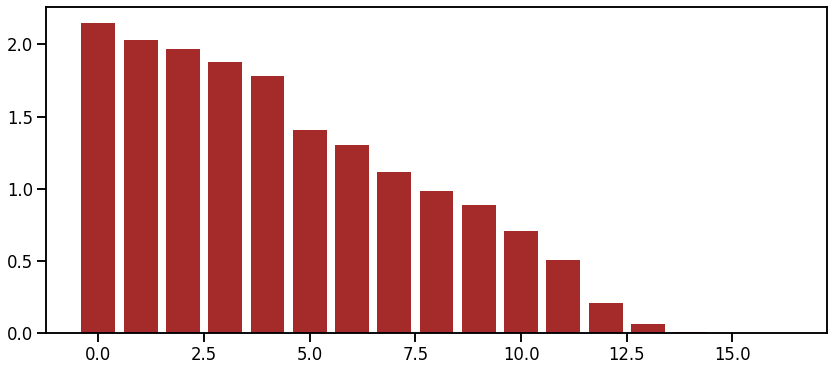

In [ ]:
#Variance ration v/s Principal component plot
plt.figure(figsize=(14,6))
plt.bar(np.arange(pca.n_components_), pca.explained_variance_, color ="brown")

Text(0.5, 1.0, 'Elbow Plot')

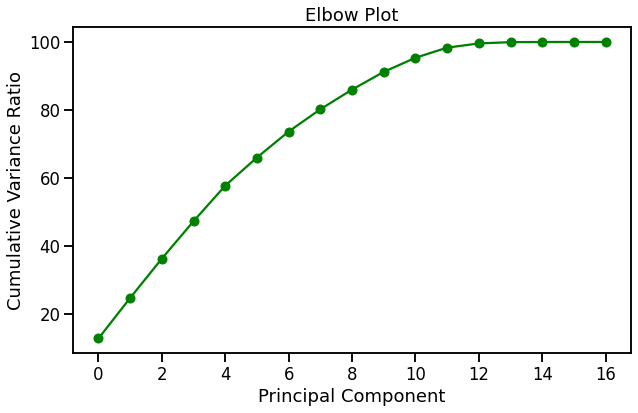

In [ ]:
#Cumulative variance ratio

plt.figure(figsize=(10,6))
plt.plot(np.cumsum(rat_var)*100, color='g', marker='o')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Variance Ratio')
plt.title('Elbow Plot')

In [ ]:
pca = PCA(n_components=12)
transform = pca.fit_transform(x)
pca.explained_variance_

array([2.1497116 , 2.02949736, 1.96945821, 1.87434285, 1.78205964,
       1.4069982 , 1.30246746, 1.11438911, 0.98785997, 0.88549143,
       0.70614846, 0.508181  ])

Text(0.5, 1.0, 'Contribuition of particular feature to our Principal Component Analysis')

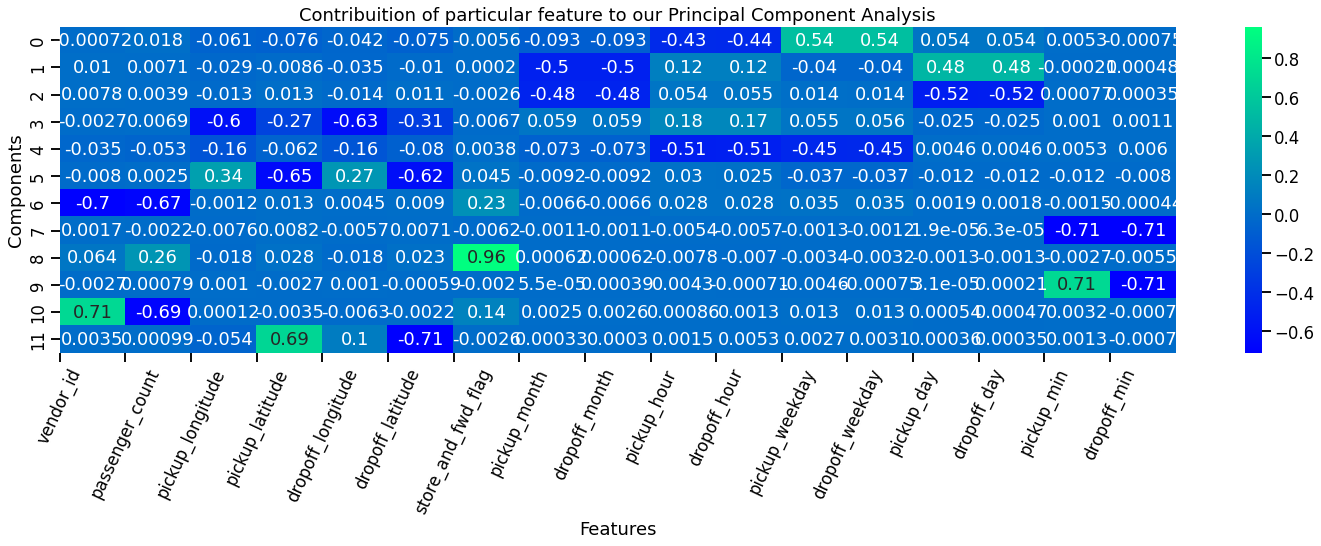

In [ ]:
plt.figure(figsize=(25,6))
sns.heatmap(pca.components_, annot=True, cmap='winter')
plt.xlabel('Features')
plt.ylabel('Components')
plt.xticks(np.arange(len(x.columns)), x.columns, rotation=65)
plt.title('Contribuition of particular feature to our Principal Component Analysis')


# **Splitting Data and Choosing Algorithms-**

In [ ]:
x = transform
y = np.log(nyc_taxi_df['trip_duration']).values

In [ ]:
#Importing train test split and some important metrics
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1021002, 12), (437573, 12), (1021002,), (437573,))

## **Linear Regression**

In [ ]:
#Implementing Linear Regression
from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(x_train, y_train)
lr_pred = est_lr.predict(x_test)
lr_pred

array([6.60730673, 6.73018042, 6.34298622, ..., 6.56786014, 6.35823769,
       6.4122349 ])

In [ ]:
#Cofficient and Intercept
est_lr.intercept_, est_lr.coef_

(6.464385084610067,
 array([-0.02227573, -0.01049946, -0.02321477,  0.00120592, -0.0124628 ,
         0.11692357, -0.0174535 ,  0.00327722,  0.00994111, -0.00328942,
         0.00298062, -0.01422948]))

In [ ]:
#Examing scores

print ("Training Score :", est_lr.score(x_train, y_train))

print ("Validation Score :", est_lr.score(x_test, y_test))

print ("Cross Validation Score" ,  cross_val_score(est_lr, x_train, y_train, cv=5).mean())

print ("R2_Score" ,  r2_score(lr_pred, y_test)) 

Training Score : 0.03899016879751682
Validation Score : 0.05105023842678713
Cross Validation Score 0.033030959678334096
R2_Score -34.84345130272148


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 1.0, 'Test v/s Prediction')

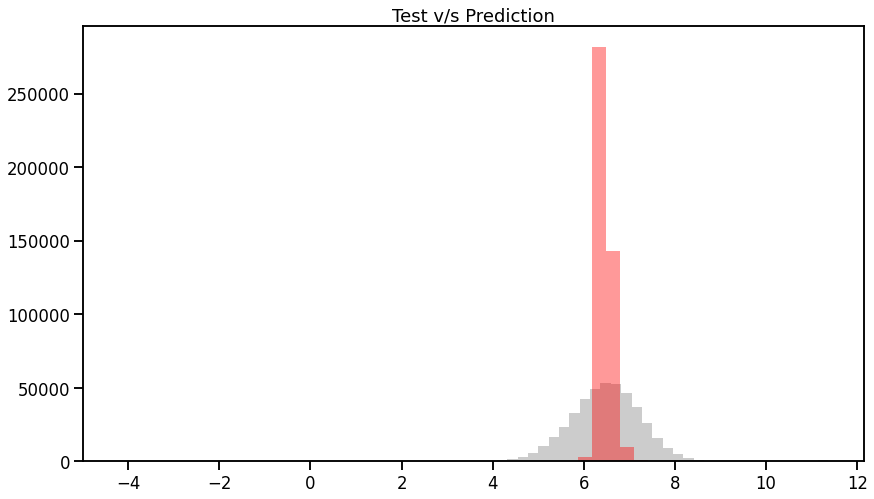

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color='grey', label='Test')

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color='red', label='Prediction')
plt.legend
plt.title('Test v/s Prediction')


## **Decision Tree**

In [ ]:
#Implementation of Decision Tree
from sklearn.tree import DecisionTreeRegressor

est_dt = DecisionTreeRegressor(criterion = 'mse', max_depth = 10)
est_dt.fit(x_train, y_train)
dt_pred = est_dt.predict(x_test)
dt_pred

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([6.86745026, 8.1662176 , 5.48610979, ..., 4.84303015, 6.73562105,
       6.73434021])

In [ ]:
print ("Training Score :" , est_dt.score(x_train, y_train))

print ("Validation Score :", est_dt.score(x_test, y_test))

print ("Cross Validation Score:", cross_val_score(est_dt, x_train, y_train, cv=5).mean())

print ("R2_score :", r2_score(dt_pred, y_test))

print ("RMSE :" , np.sqrt(mean_squared_log_error(dt_pred, y_test)))

Training Score : 0.9507264895276575
Validation Score : 0.9426964759962344


/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

Cross Validation Score: 0.9415647792596331
R2_score : 0.9394936211436057
RMSE : 0.030205636909508563


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 1.0, 'Test v/s Prediction')

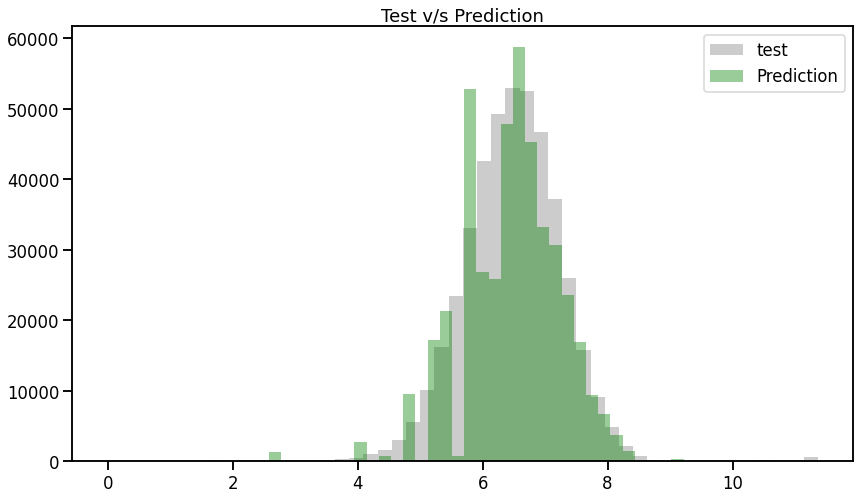

In [ ]:
plt.figure(figsize=(14,8))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color='grey', label='test')

plt.subplot(1,1,1)
sns.distplot(dt_pred, kde=False, color='green', label='Prediction')
plt.legend()
plt.title('Test v/s Prediction')

## **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

est_rf = RandomForestRegressor(criterion='mse', n_estimators=5, max_depth=8)
est_rf.fit(x_train, y_train)
rf_pred = est_rf.predict(x_test)
rf_pred

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


array([6.86849712, 8.16006258, 5.48787441, ..., 4.84520595, 6.69896353,
       6.7347023 ])

In [ ]:
print ("Training score :", est_rf.score(x_train,y_train))

print ("Validation score :", est_rf.score(x_test, y_test))

print ("Cross Validation score :", cross_val_score(est_rf, x_train, y_train, cv=5).mean())

print ("R2_score :", r2_score(rf_pred, y_test))

print ("RMSE :", np.sqrt(mean_squared_log_error(rf_pred, y_test)))

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,


Cross Validation score : 0.9402969577447745
R2_score : 0.9365096946865775
RMSE : 0.030716334494913206


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 1.0, 'Test v/s Prediction')

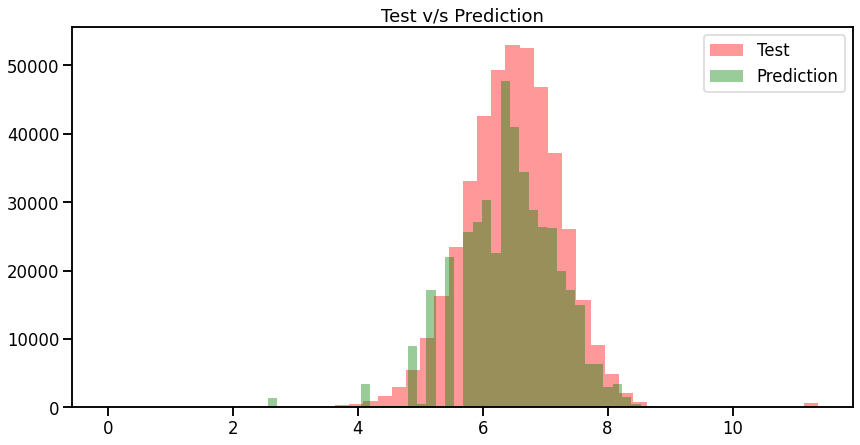

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color='red', label="Test")

plt.subplot(1,1,1)
sns.distplot(rf_pred, kde=False, color='green', label='Prediction')
plt.legend()
plt.title('Test v/s Prediction')

## **R2 Score Evaluation**

Text(0.5, 1.0, 'r2_scores')

<Figure size 720x432 with 0 Axes>

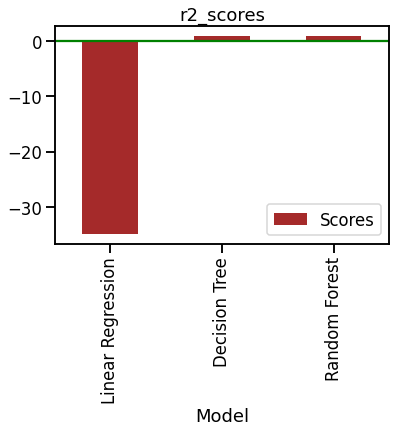

In [ ]:
plt.figure(figsize=(10,6))
r2 = pd.DataFrame({'Scores' : np.array([r2_score(lr_pred,y_test), r2_score(dt_pred,y_test), r2_score(rf_pred,y_test)]), 'Model' : np.array(['Linear Regression', 'Decision Tree', 'Random Forest'])})
r2.set_index('Model').plot(kind='bar', color='brown')
plt.axhline(y=0, color='g')
plt.title("r2_scores")


## **RMSE Evaluation**

Text(0.5, 1.0, 'RMSE - Better one is Lesser')

<Figure size 720x576 with 0 Axes>

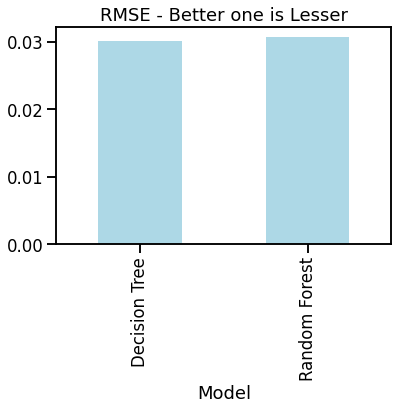

In [ ]:
plt.figure(figsize=(10,8))
r2 = pd.DataFrame({'RMSE': np.array([np.sqrt(mean_squared_log_error(dt_pred,y_test)), np.sqrt(mean_squared_log_error(rf_pred, y_test))]), 'Model': np.array(['Decision Tree','Random Forest'])})
r2.set_index('Model').plot(kind='bar', color='lightblue', legend=False)
plt.title('RMSE - Better one is Lesser')

## **Second Approach - Without PCA**

In [ ]:
x = new_df
y = np.log(nyc_taxi_df['trip_duration']).values

## **Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import r2_score, mean_squared_log_error, mean_squared_error

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.30, random_state=10)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1021002, 17), (437573, 17), (1021002,), (437573,))

In [ ]:
from sklearn.linear_model import LinearRegression

est_lr = LinearRegression()
est_lr.fit(x_train, y_train)
lr_pred = est_lr.predict(x_test)
lr_pred

array([6.56033356, 6.81841947, 6.30186823, ..., 6.47534896, 6.38177143,
       6.39190541])

In [ ]:
est_lr.intercept_ , est_lr.coef_

(6.464564523731725,
 array([ 3.94900490e-03,  1.19894711e-02,  7.35255306e-02, -6.89023632e-02,
        -6.98441069e-03, -5.75382533e-02,  9.81949992e-03, -3.84193624e+02,
         3.84268005e+02, -2.00860516e+00,  2.06456308e+00, -6.82821644e-02,
         4.75596832e-02, -6.56118744e+01,  6.56194938e+01, -9.66869806e-02,
         9.13487143e-02]))

In [ ]:
print ("Training score :", est_lr(x_train, y_train))

print ('Validation score :', est_lr(x_test, y_test))

print ('Cross validation score :', cross_val_score(est_lr, x_train, y_train, cv=5).mean())

print ('R2 score :', r2_score(lr_pred, y_test))

TypeError: ignored

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


Text(0.5, 1.0, 'Test v/s Prediction')

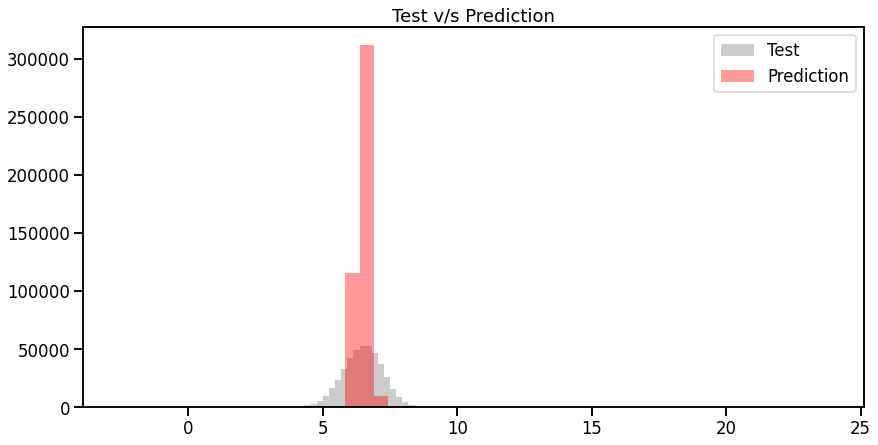

In [ ]:
plt.figure(figsize=(14,7))
plt.subplot(1,1,1)
sns.distplot(y_test, kde=False, color='grey', label='Test')

plt.subplot(1,1,1)
sns.distplot(lr_pred, kde=False, color='red', label='Prediction')
plt.legend()
plt.title('Test v/s Prediction')
